(useful_pandas_notebook)=
# Comandi utili in Pandas

In questo Notebook presento una serie di utili comandi per l'analisi e la manipolazione di dati con Pandas. Inizio a importare le librerie necessarie.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [2]:
# To render higher resolution images and to control the plot style.
%config InlineBackend.figure_format = 'retina'
# To enable the drawing of matplotlib figures in the IPython environment.
%matplotlib inline
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

## Inserire array Numpy in un DataFrame 

Nel capitolo {ref}`numpy_ndarray_notebook` abbiamo visto come creare array Numpy. Gli array Numpy possono essere utilizzati per popolare un DataFrame pandas.

In [17]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([6, 7, 8, 9, 10])

df = pd.DataFrame()
df['column_a'] = x1
df['column_b'] = x2
print(df)

   column_a  column_b
0         1         6
1         2         7
2         3         8
3         4         9
4         5        10


In maniera equivalente, possiamo passare a `pd.DataFrame` la trasposta di un array 2-D:

In [25]:
my_array = np.array([x1, x2])
np.shape(my_array)

(2, 5)

In [27]:
df = pd.DataFrame(my_array.transpose(), columns = ['column_a','column_b'])
print(df)

   column_a  column_b
0         1         6
1         2         7
2         3         8
3         4         9
4         5        10


## Leggere i dati da un file esterno

È anche possibile creare un DataFrame importando un file esterno. In questo esempio userò nuovamente i dati [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/) messi a disposizione da Allison Horst. Per creare un pandas DataFrame uso la funzione `pd.read_csv` a cui passo l'indirizzo di un file csv disponibile su internet:

In [3]:
data_url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/'
file_name = 'penguins.csv'
file_url = data_url + "/" + file_name
df = pd.read_csv(file_url)

## Esaminare il DataFrame

Ottengo il nome delle colonne di `df` con il metodo `.columns`:

In [4]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Visualizzo le prime 5 righe di `df` con `.head()`:

In [5]:
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


Visualizzo le ultime 5 righe:

In [6]:
print(df.tail())

       species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210.0   
343  Chinstrap  Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009  


La funzione `.describe()` fornisce delle informazioni descrittive del dataset. Queste informazioni includono delle statistiche che riassumono la tendenza centrale della variabile, la loro dispersione, la presenza di valori vuoti e la loro forma:

In [7]:
df.describe().round(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.0,342.0,342.0,342.0,344.0
mean,43.9,17.2,200.9,4201.8,2008.0
std,5.5,2.0,14.1,802.0,0.8
min,32.1,13.1,172.0,2700.0,2007.0
25%,39.2,15.6,190.0,3550.0,2007.0
50%,44.4,17.3,197.0,4050.0,2008.0
75%,48.5,18.7,213.0,4750.0,2009.0
max,59.6,21.5,231.0,6300.0,2009.0


La funzione `.info()` restituisce informazioni sul tipo di dato, valori non nulli e utilizzo di memoria:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Se applico il metodo `.shape` sul dataset, Pandas restituisce una coppia di numeri che rappresentano la dimensionalità del dataset: il numero di righe e il numero di colonne.

In [11]:
print(df.values.shape)

(344, 8)


Ci sono 344 righe e 8 colonne.

Se le operazioni di manipolazione del dataset richiedono molto tempo (non nel caso presente), è utile avere una copia del dataset originale, nel caso di errori di vario tipo (cancellare per sbaglio una colonna o trasformarla in maniera diversa da quella desiderata).

In [220]:
df2 = df.copy()

## Visualizzare le modalità di una variabile

La funzione `unique()` resituisce le modalità di una variabile:

In [8]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

La funzione `value_counts()` restituisce la distribuzione di frequenza assoluta di una variabile del DataFrame. Per la variabile `species` ottengo:

In [12]:
df['species'].value_counts(normalize=False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Le frequenze relative si ottengono ponendo `normalize=True`:

In [13]:
df['species'].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

Come abbiamo già visto nel capitolo {ref}`edaquickstart_notebook`, è semplice costruire un diagramma a barre per la distribuzione di frequenza:

<AxesSubplot: >

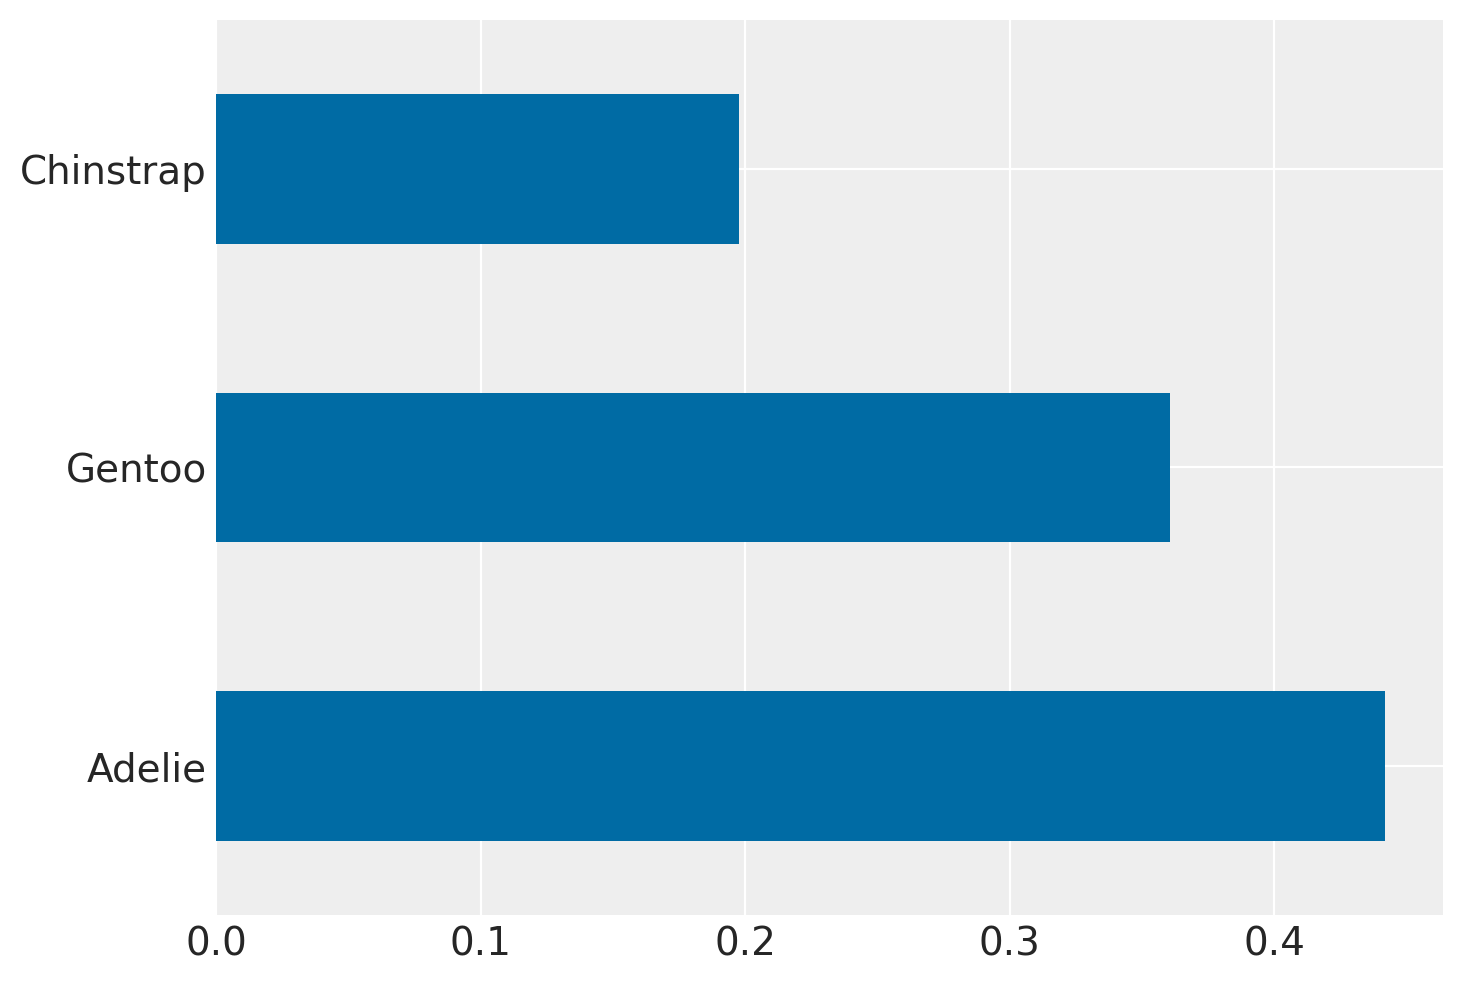

In [9]:
df.species.value_counts(normalize=True).plot(kind="barh")

In maniera simile, è possibile applicare il metodo `.hist()` ad una colonna numerica del DataFrame per ottenere un istogramma. Per esempio:

<AxesSubplot: >

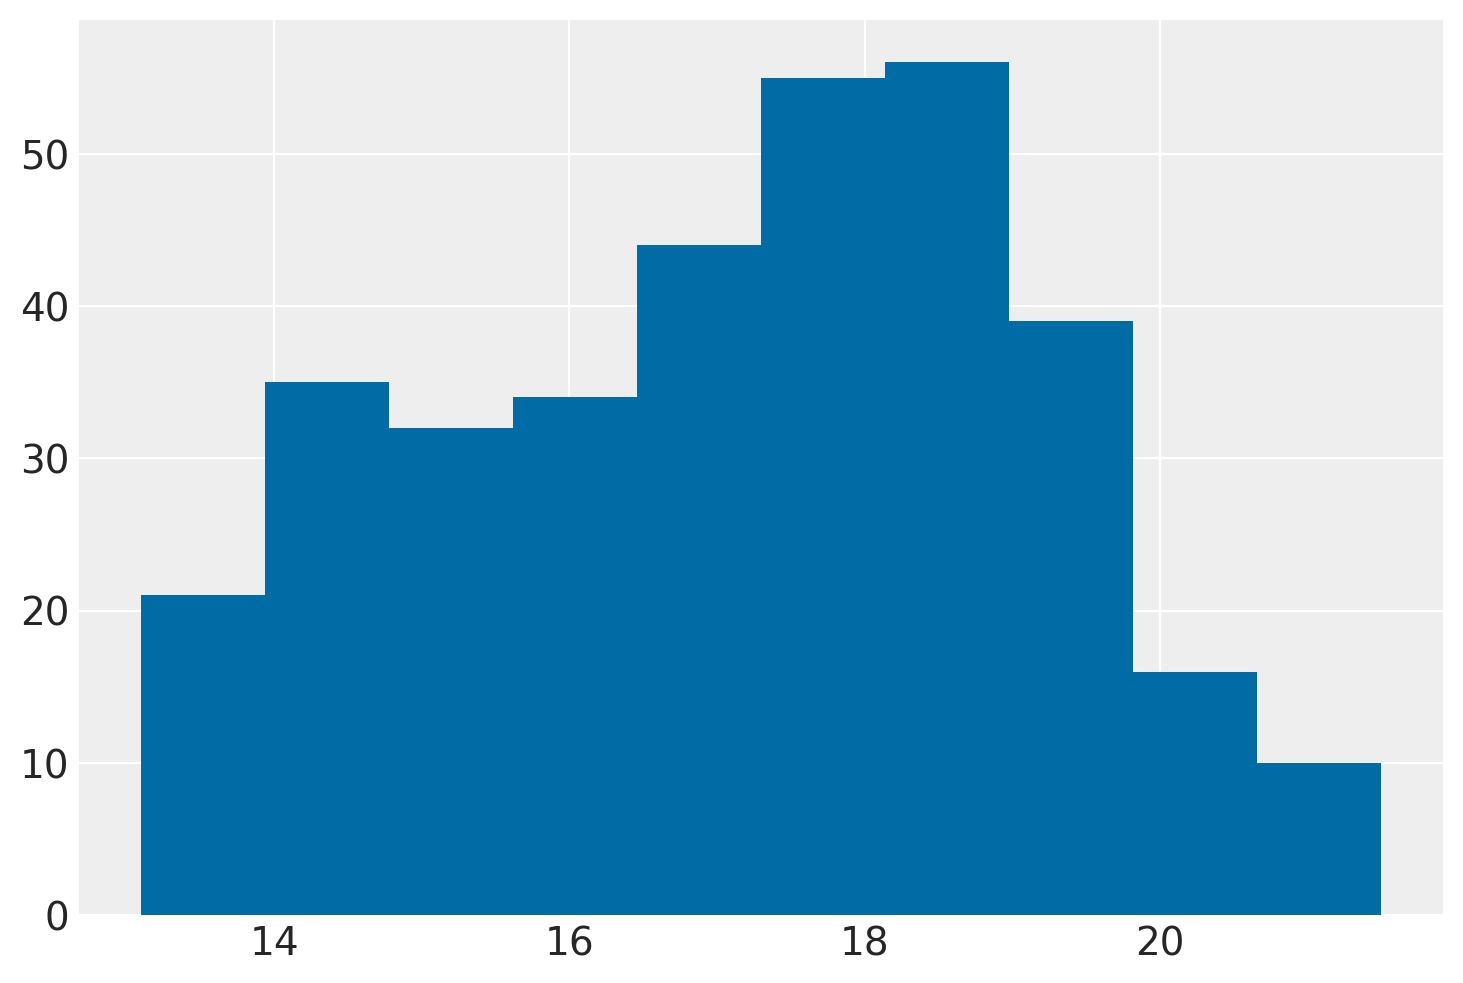

In [27]:
df['bill_depth_mm'].hist()

Dato che la funzione `hist()` utilizza `matplotlib`, possiamo passare a `hist()` gli argomenti che sono disponibili in `matplotlib`. Per esempio:

<AxesSubplot: >

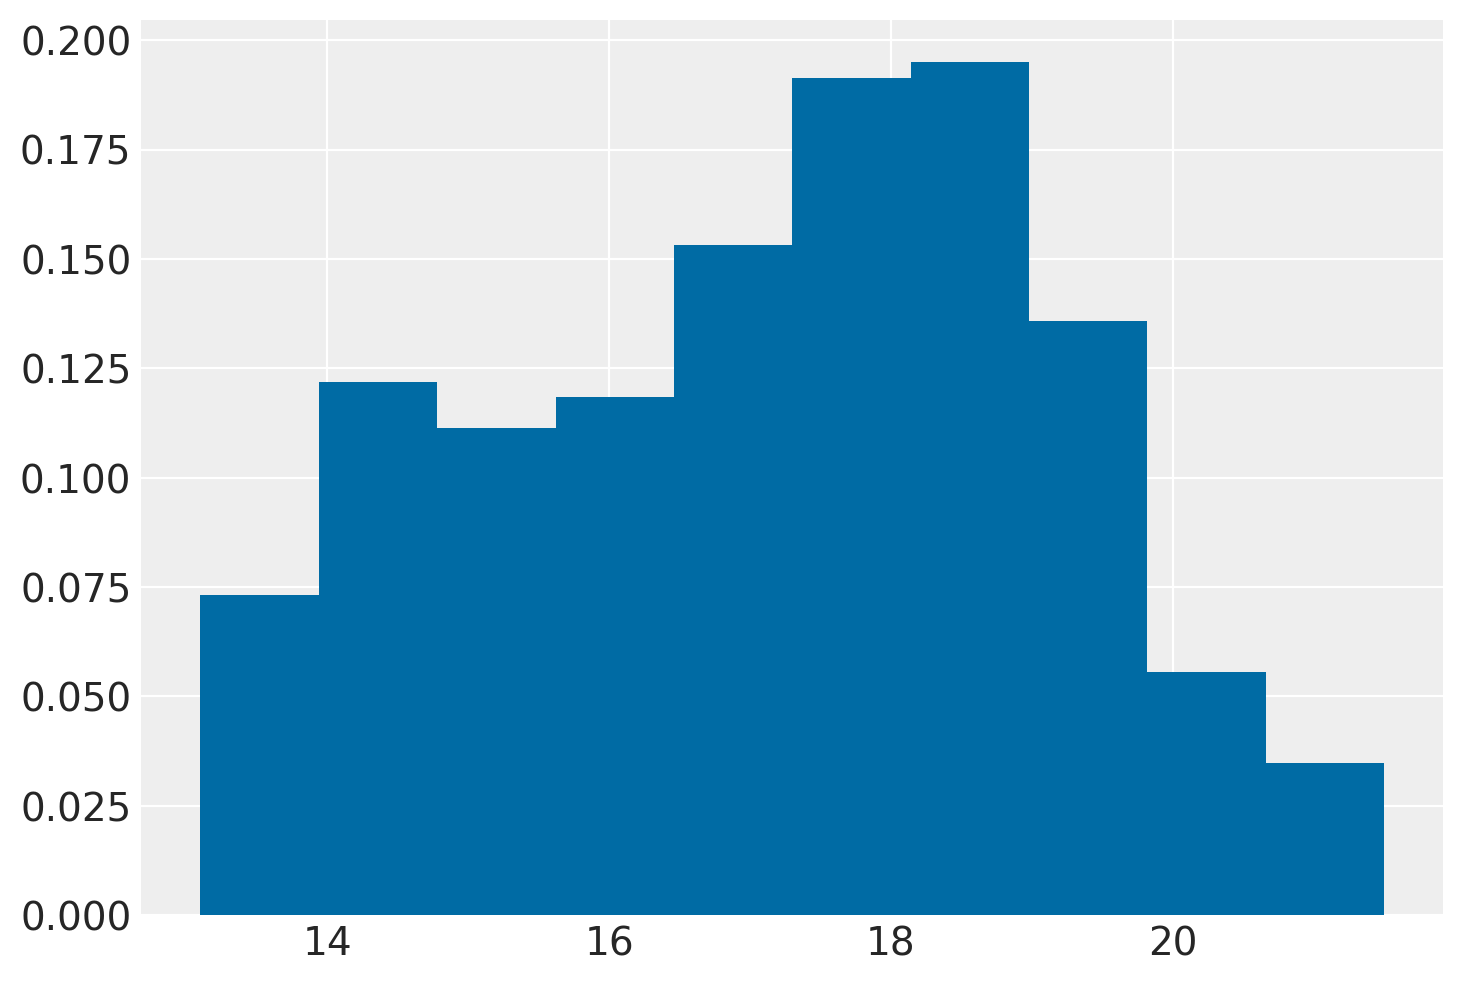

In [28]:
df['bill_depth_mm'].hist(density=True)

Consideriamo nuovamente la grossezza (depth) del becco.

![](images/culmen_depth.png)

Calcoliamo la proporzione di pinguini per i quali la grossezza del becco è minore della media:

In [29]:
mean_bill_depth = np.mean(df['bill_depth_mm'])
frac_below_mean = (df['bill_depth_mm'] < mean_bill_depth).mean()
print(f"{frac_below_mean:2.1%} of penguins are below the mean")

46.5% of penguins are below the mean


Usando le funzioni di `matplotlib.pyplot`, creo un istogramma della grossezza (depth) del becco che riporta l'indicazione della media:

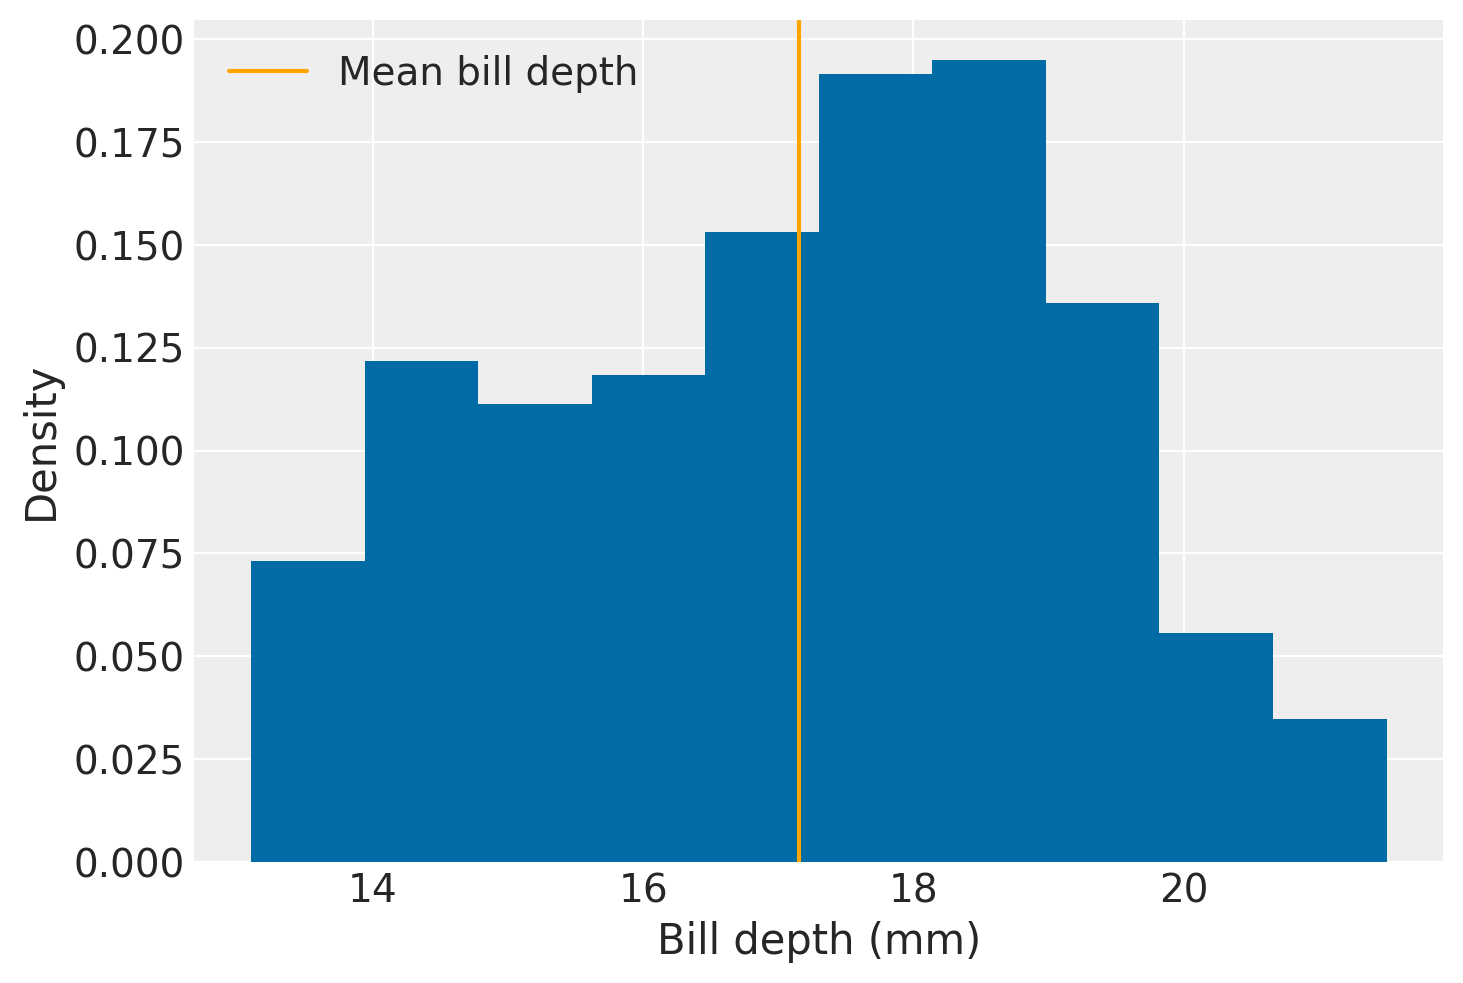

In [30]:
plt.hist(df['bill_depth_mm'], density=True)
plt.xlabel("Bill depth (mm)")
plt.ylabel("Density")
plt.axvline(mean_bill_depth, color="orange", label="Mean bill depth")
plt.legend()


## Selezionare le colonne con `filter`

Molto spesso è necessario concentrarci su un sottoinsieme delle colonne del dataset.  Per esempio qui di seguito seleziono unicamente due colonne:

In [205]:
keep_cols = ['bill_length_mm', 'bill_depth_mm']
df_v2 = df.filter(keep_cols)
df_v2.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3


Oppure è possibile che si vogliano eliminare una o più colonne:

In [221]:
drop_cols = ['sex', 'year']
df2.drop(drop_cols, axis=1, inplace=True)
df2.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0


Si noti che `axis=1` si riferisce alle colonne mentre `axis=0` fa riferimento alle righe. L'argomento `inplace` impostato su `True` aggiorna l'oggetto originale in maniera permanente.

## Selezionare le righe con `isin`

Un'operazione molto comune nell'analisi dei dati corrisponde alla selezione di un insieme di righe dal DataFrame. Supponiamo di volere escludere tutte le osservazioni (righe) che si riferiscono all'isola `Torgersen`. Per prima cosa stampo le modalità di `island`:

In [19]:
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

Ora elenco le modalità che voglio mantenere:

In [ ]:
filtered_list = ['Biscoe', 'Dream']

Infine, applico il medoto `.isin()`:

In [20]:
check1 = df[df['island'].isin(filtered_list)]
check1['island'].unique()

array(['Biscoe', 'Dream'], dtype=object)

## Ordinare le colonne

Talvolta è utile avere nel DataFrame le colonne in un certo ordine.

In [21]:
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007


Ora cambio l'ordine delle colonne applicando il metodo `.reindex()`:

In [23]:
new_order = ['species', 'island', 'sex', 'year', 'flipper_length_mm', 'body_mass_g', 
             'bill_length_mm', 'bill_depth_mm']
df_new = df.reindex(new_order, axis=1)
df_new.head(2)

,species,island,sex,year,flipper_length_mm,body_mass_g,bill_length_mm,bill_depth_mm
0,Adelie,Torgersen,male,2007,181.0,3750.0,39.1,18.7
1,Adelie,Torgersen,female,2007,186.0,3800.0,39.5,17.4


## Rinominare le colonne 

Molto spesso succede di volere rinominare le colonne del DataFrame. A questo fine è possibile usare il metodo `.rename()`. Si presti attenzione alla sintassi `'old_name': 'new_name'`:

In [25]:
df_new = df_new.rename(
    # 'old_name': 'new_name'
    columns={'bill_length_mm': 'bill_length',
             'bill_depth_mm': 'bill_depth'
            })
df_new.head(2)


,species,island,sex,year,flipper_length_mm,body_mass_g,bill_length,bill_depth
0,Adelie,Torgersen,male,2007,181.0,3750.0,39.1,18.7
1,Adelie,Torgersen,female,2007,186.0,3800.0,39.5,17.4


## Convertire un DataFrame in formato *long*

Capita spesso che i dati siano in formato *wide*, ovvero con le misurazioni (per esempio, temporali) dello stesso soggetto (o unità statistica) poste su diverse colonne. Quasi sempre vogliamo però che i dati siano in formato *tidy* (in questo caso, *long*), con tutti i dati della stessa variabile nella stessa colonna. È dunque necessario convertire un DataFrame dal formato *wide* a *long*.

Per mostrare come si fa, creo un DataFrame più piccolo. Supponiamo che vi siano 4 soggetti, ciascuno identificato da un codice (`subj_idx`), i quali sono stati esaminati in 2 condizioni (`A`, `B`). I soggetti sono stati esaminati in tre momenti temporali diversi (`t_1`, `t_2`, `t_3`). Qui sotto presento i dati nel formato *wide*, nel quale le misurazioni (`t_1`, `t_2`, `t_3`) sono presenti su tre colonne:

In [222]:
mydf = pd.DataFrame({"subj_idx": ['h38g18', 'hjds36', 'ghs41j', 'd33gjz'],
                     "condition": ['A', 'B', 'A', 'A'],
                     "t_1": [10.2, 9.6, 8.8, 5.2],
                     "t_2": [1.1, 3.5, None, 66.],
                     "t_3": [2.5, 1.3, 1.7, None]})
mydf

,subj_idx,condition,t_1,t_2,t_3
0,h38g18,A,10.2,1.1,2.5
1,hjds36,B,9.6,3.5,1.3
2,ghs41j,A,8.8,NaN,1.7
3,d33gjz,A,5.2,66.0,NaN


Si noti che ho costruito il DataFrame utilizzando la sintassi del dizionario. In maniera equivalente, posso procedere nel modo seguente:

In [231]:
mydf = pd.DataFrame()

subj_idx = ['h38g18', 'hjds36', 'ghs41j', 'd33gjz']
condition = ['A', 'B', 'A', 'A']
t_1 = [10.2, 9.6, 8.8, 5.2]
t_2 = [1.1, 3.5, None, 66.]
t_3 = [2.5, 1.3, 1.7, None]

mydf['subj_idx'] = subj_idx
mydf['condition'] = condition
mydf['t_1'] = t_1
mydf['t_2'] = t_2
mydf['t_3'] = t_3

mydf

,subj_idx,condition,t_1,t_2,t_3
0,h38g18,A,10.2,1.1,2.5
1,hjds36,B,9.6,3.5,1.3
2,ghs41j,A,8.8,NaN,1.7
3,d33gjz,A,5.2,66.0,NaN


Per molte analisi dei dati è necessario che i dati siano in formato *long*, ovvero, per l'esempio presente, nella forma di un DataFrame in cui è presente una colonna con tre modalità (`t_1`, `t_2`, `t_3`) e una colonna che riporta i valori che originariamenete erano nelle tre colonne `t_1`, `t_2`, `t_3` del DataFrame `mydf`. Il risultato desiderato si ottiene con il metodo `.melt()`:

In [225]:
mydf_long = mydf.melt(id_vars=['subj_idx', 'condition'])
mydf_long

,subj_idx,condition,variable,value
0,h38g18,A,t_1,10.2
1,hjds36,B,t_1,9.6
2,ghs41j,A,t_1,8.8
3,d33gjz,A,t_1,5.2
4,h38g18,A,t_2,1.1
5,hjds36,B,t_2,3.5
6,ghs41j,A,t_2,NaN
7,d33gjz,A,t_2,66.0
8,h38g18,A,t_3,2.5
9,hjds36,B,t_3,1.3


Per chiarezza rinomino le due nuove colonne:

In [226]:
mydf_long = mydf_long.rename(
    # 'old_name': 'new_name'
    columns={'variable': 'time',
             'value': 'y'
             })
mydf_long


,subj_idx,condition,time,y
0,h38g18,A,t_1,10.2
1,hjds36,B,t_1,9.6
2,ghs41j,A,t_1,8.8
3,d33gjz,A,t_1,5.2
4,h38g18,A,t_2,1.1
5,hjds36,B,t_2,3.5
6,ghs41j,A,t_2,NaN
7,d33gjz,A,t_2,66.0
8,h38g18,A,t_3,2.5
9,hjds36,B,t_3,1.3


## Salvare un file csv

Se vogliamo salvare i dati contenuti in un DataFrame usiamo il metodo `.to_csv()`. Ad esempio, salvo nella cartella `data` il file `my_new_file.csv` che contiene i dati `mydf_long`:

In [56]:
mydf_long.to_csv('data/my_new_file.csv')

Per controllare che abbia funzionato, esamino i file della cartella `data`:

In [57]:
import os
print(os.system("ls -al data"))

total 1472
drwxr-xr-x  15 corrado  staff     480 Jan  6 07:31 .
drwxr-xr-x  60 corrado  staff    1920 Jan  6 07:55 ..
-rw-r--r--@  1 corrado  staff    6148 Jan  4 09:47 .DS_Store
-rw-r--r--   1 corrado  staff   44762 Nov 20 08:11 MehrSongSpelke_exp_1.csv
-rw-r--r--   1 corrado  staff  382365 Nov 20 08:11 data.mood.csv
-rw-rw-r--@  1 corrado  staff   59084 Nov  8  2021 datasaurus.csv
-rwxr-xr-x   1 corrado  staff   52843 Nov 20 08:11 heights.RDS
-rwxr-xr-x   1 corrado  staff   53636 Nov 20 08:11 heights.csv
-rwxr-xr-x   1 corrado  staff   13078 Nov 20 08:11 kidiq.dta
-rw-r--r--   1 corrado  staff    1392 Nov 20 08:11 kilpisjarvi-summer-temp.csv
-rw-r--r--@  1 corrado  staff     256 Jan  6 07:58 my_new_file.csv
-rw-rw-r--   1 corrado  staff   15241 Dec 25 05:06 penguins.csv
-rw-r--r--   1 corrado  staff   81099 Nov 20 08:11 pone.0201581.s001.sav
-rw-r--r--   1 corrado  staff   12587 Nov 20 08:11 psicometria_2021.txt
-rwxr-xr-x   1 corrado  staff     761 Nov 20 08:11 seaice.csv
0


Si noti che ho usato il metodo `os.system()` il quale prende come argomento una stringa contenente le normali istruzioni che vengono usate sulla console del sistema operativo (nel mio caso, comandi Unix).

## Cambiare i valori del DataFrame

Per cambiare i valori di un DataFrame uso il metodo `.mask()` che dipende dalle condizioni logiche specificate. Per fare un esempio, uso nuovamente il DataFrame più piccolo creato sopra:

In [227]:
mydf

,subj_idx,condition,t_1,t_2,t_3
0,h38g18,A,10.2,1.1,2.5
1,hjds36,B,9.6,3.5,1.3
2,ghs41j,A,8.8,NaN,1.7
3,d33gjz,A,5.2,66.0,NaN


Per identificare la cella del DataFrame che voglio cambiare, specifico (ad esempio) due condizioni logiche:

- `mydf['subj_idx'] == 'hjds36'`
- `mydf['condition'] == 'B'`

Se entrambe queste condizioni logiche sono soddisfatte (ovvero, quando ho identificato la cella di interesse), allora cambio il valore della colonna `t_2` che da 3.0 deve diventare 100.0:

In [232]:
mydf['t_2'].mask(
    (mydf['subj_idx'] == 'hjds36') & (mydf['condition'] == 'B'),
    100.0, inplace=True)
mydf

,subj_idx,condition,t_1,t_2,t_3
0,h38g18,A,10.2,1.1,2.5
1,hjds36,B,9.6,100.0,1.3
2,ghs41j,A,8.8,NaN,1.7
3,d33gjz,A,5.2,66.0,NaN


Il metodo `.mask()` può anche essere usato per creare una nuova colonna. Per esempio, aggiungo la misurazione `t_4` al soggetto `ghs41j` nella condizione `A`:

In [233]:
mydf['t_4'] = ""
mydf['t_4'].mask(
    (mydf['subj_idx'] == 'ghs41j') & (mydf['condition'] == 'A'),
    9.3, inplace=True)
mydf

,subj_idx,condition,t_1,t_2,t_3,t_4
0,h38g18,A,10.2,1.1,2.5,
1,hjds36,B,9.6,100.0,1.3,
2,ghs41j,A,8.8,NaN,1.7,9.3
3,d33gjz,A,5.2,66.0,NaN,


## Cambiare il tipo di dato di una variabile

Talvolta i valori di una colonna del DataFrame sono stati inseriti come stringhe di testo anche se sono dei numeri. Si noti l'uso degli apici (potrebbero essere, in maniera equivalente, delle virgolette):

In [234]:
mydf['new_vals'] = ['2', '1', '2', '1']
mydf

,subj_idx,condition,t_1,t_2,t_3,t_4,new_vals
0,h38g18,A,10.2,1.1,2.5,,2
1,hjds36,B,9.6,100.0,1.3,,1
2,ghs41j,A,8.8,NaN,1.7,9.3,2
3,d33gjz,A,5.2,66.0,NaN,,1


Il linguaggio Python utilizza la *tipizzazione dinamica* delle variabili. Ciò significa che, in Python, non occorre dichiarare il tipo di una variabile prima di usarla. L'interprete riconosce automaticamente il dato e assegna alla variabile il tipo di dato (numerica, stringa, booleana). Esaminiamo il tipo di dato per `new_val`:

In [115]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subj_idx   4 non-null      object 
 1   condition  4 non-null      object 
 2   t_1        4 non-null      float64
 3   t_2        3 non-null      float64
 4   t_3        3 non-null      float64
 5   t_4        4 non-null      object 
 6   new_vals   4 non-null      object 
dtypes: float64(3), object(4)
memory usage: 352.0+ bytes


La variabile `new_val` è di tipo `object`, ovvero un tipo di dato non specificato. Calcolo la media di `new_val`:

In [116]:
mydf['new_vals'].mean()

530.25

Ottengo un risultato sbagliato, perché la media non è stata calcolata sui valori numerici 2, 1, 2, 1, ma bensì sui valori numerici associati alle stringhe inserite nel DataFrame (quali che essi siano). Prima di calcolare la media è quindi necessario cambiare il tipo di dato della variabile `new_val`, trasformandola in `float` (numero decimale). A questo fino uso il metodo `.astype()`:

In [235]:
mydf['new_vals'] = mydf['new_vals'].astype(float)

In [119]:
mydf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subj_idx   4 non-null      object 
 1   condition  4 non-null      object 
 2   t_1        4 non-null      float64
 3   t_2        3 non-null      float64
 4   t_3        3 non-null      float64
 5   t_4        4 non-null      object 
 6   new_vals   4 non-null      float64
dtypes: float64(4), object(3)
memory usage: 352.0+ bytes


Ora si ottiene la media corretta:

In [236]:
mydf['new_vals'].mean()

1.5

## Il trattamento dei dati mancanti 

Molto spesso i dati psicologici includono dei dati mancanti, per varie ragioni. La trattazione dei dati mancanti (NaN) è un tema complesso. Presento qui alcune soluzioni semplici (ma non le soluzioni migliori che richiederebbero una discussione molto più lunga). 

In [237]:
print(mydf)

  subj_idx condition   t_1    t_2  t_3  t_4  new_vals
0   h38g18         A  10.2    1.1  2.5            2.0
1   hjds36         B   9.6  100.0  1.3            1.0
2   ghs41j         A   8.8    NaN  1.7  9.3       2.0
3   d33gjz         A   5.2   66.0  NaN            1.0


Inizio calcolando la media delle colonne del DataFrame ignorando i dati mancanti. In `.mean()`, se l'argomento `numeric_only` è impostato su `True`, vengono elaborati solo le colonne numeriche. L'argomento `skipna` impostato su `True` ignora le righe contenenti i dati mancanti. 

In [238]:
val = mydf.mean(axis=0, numeric_only=True, skipna=True)
print(val)

t_1          8.450000
t_2         55.700000
t_3          1.833333
new_vals     1.500000
dtype: float64


Ora sostituisco tutti i valori mancanti con lo stesso valore (ad esempio, 0):

In [239]:
temp = mydf.fillna(0)
temp

,subj_idx,condition,t_1,t_2,t_3,t_4,new_vals
0,h38g18,A,10.2,1.1,2.5,,2.0
1,hjds36,B,9.6,100.0,1.3,,1.0
2,ghs41j,A,8.8,0.0,1.7,9.3,2.0
3,d33gjz,A,5.2,66.0,0.0,,1.0


Con questa sostituzione (che non ha alcun motivo di essere applicata) le medie delle colonne sono diverse da prima (e sono prive di senso):

In [240]:
val = temp.mean(axis=0, numeric_only=True)
print(val)

t_1          8.450
t_2         41.775
t_3          1.375
new_vals     1.500
dtype: float64


Sostituisco ora i valori mancanti con valori diversi per ogni colonna:

In [241]:
print(mydf)

  subj_idx condition   t_1    t_2  t_3  t_4  new_vals
0   h38g18         A  10.2    1.1  2.5            2.0
1   hjds36         B   9.6  100.0  1.3            1.0
2   ghs41j         A   8.8    NaN  1.7  9.3       2.0
3   d33gjz         A   5.2   66.0  NaN            1.0


Uso dei valori arbitrari:

In [242]:
print(mydf.fillna({
    't_2': 5.0, 
    't_3': 10
    })
)

  subj_idx condition   t_1    t_2   t_3  t_4  new_vals
0   h38g18         A  10.2    1.1   2.5            2.0
1   hjds36         B   9.6  100.0   1.3            1.0
2   ghs41j         A   8.8    5.0   1.7  9.3       2.0
3   d33gjz         A   5.2   66.0  10.0            1.0


In maniera più sensato, possiamo sostituire i valori mancanti con valori diversi per ciascuna colonna e corrispondenti alla media di colonna:

In [243]:
temp = mydf.fillna(mydf.mean(numeric_only=True))
temp

,subj_idx,condition,t_1,t_2,t_3,t_4,new_vals
0,h38g18,A,10.2,1.1,2.500000,,2.0
1,hjds36,B,9.6,100.0,1.300000,,1.0
2,ghs41j,A,8.8,55.7,1.700000,9.3,2.0
3,d33gjz,A,5.2,66.0,1.833333,,1.0


Ora le medie delle colonne sono identiche a quelle che avevamo ottenuto ignorando i dati mancanti. Il vantaggio è che non abbiamo più celle del DataFrame in cui sono presenti dati mancanti -- molte analisi statistiche richiedono l'assenza di dati mancanti.

In [244]:
val = temp.mean(axis=0, numeric_only=True)
print(val)

t_1          8.450000
t_2         55.700000
t_3          1.833333
new_vals     1.500000
dtype: float64


In maniera simile è possibile sostituire i valori mancanti con la mediana:

In [245]:
temp = mydf.fillna(mydf.median(numeric_only=True))
temp

,subj_idx,condition,t_1,t_2,t_3,t_4,new_vals
0,h38g18,A,10.2,1.1,2.5,,2.0
1,hjds36,B,9.6,100.0,1.3,,1.0
2,ghs41j,A,8.8,66.0,1.7,9.3,2.0
3,d33gjz,A,5.2,66.0,1.7,,1.0


In [246]:
val = temp.mean(axis=0, numeric_only=True)
print(val)

t_1          8.450
t_2         58.275
t_3          1.800
new_vals     1.500
dtype: float64


Se ci sono pochissimi dati mancanti è possibile eliminare tute le righe che contengono dati mancanti usando `.dropna()`. Per l'esempio presente, elimino tutte le righe in cui è presente un dato mancante su qualsiasi colonna:

In [151]:
print(mydf)

  subj_idx condition   t_1    t_2  t_3  t_4  new_vals
0   h38g18         A  10.2    1.1  2.5            2.0
1   hjds36         B   9.6  100.0  1.3            1.0
2   ghs41j         A   8.8    NaN  1.7  9.3       2.0
3   d33gjz         A   5.2   66.0  NaN            1.0


In [152]:
print(mydf.dropna(axis=0))

  subj_idx condition   t_1    t_2  t_3 t_4  new_vals
0   h38g18         A  10.2    1.1  2.5           2.0
1   hjds36         B   9.6  100.0  1.3           1.0


Per rimuovere le righe in base a colonne specifiche è necessario specificare un elenco di etichette (nomi) di colonne nell'argomento `subset()`. Per esempio, rimuovo le righe del DataFrame solo se sono presenti dati mancanti nella colonna `t_3`:

In [154]:
print(mydf.dropna(subset=['t_3']))

  subj_idx condition   t_1    t_2  t_3  t_4  new_vals
0   h38g18         A  10.2    1.1  2.5            2.0
1   hjds36         B   9.6  100.0  1.3            1.0
2   ghs41j         A   8.8    NaN  1.7  9.3       2.0


Questo è utile, per esempio, se vogliamo analizzare i dati di `t_3` in funzione di `condition`. Come abbiamo visto in precedenza, se impostiamo l'argomento `inplace` su `True`, l'oggetto originale viene aggiornato.

## Statistica descrittiva di dati ragruppati

Ritorniamo al DataFrame `df`. Succede molto spesso di volere calcolare delle statistiche descrittive (es., media, deviazione standard, ecc.) per diversi gruppi di dati. Supponiamo di volere trovare la media di `body_mass_g` per ciascuna specie di pinguini:

In [171]:
summary_stats = (df.loc[:, ['species', 'body_mass_g']]
                         .groupby('species')
                         .aggregate(['mean', 'std', 'count']))
summary_stats

body_mass_g                  
                  mean         std count
species                                 
Adelie     3700.662252  458.566126   151
Chinstrap  3733.088235  384.335081    68
Gentoo     5076.016260  504.116237   123

Nell'istruzione precedente `df.loc[:, ['species', 'body_mass_g']]` seleziona tutte le righe (`:`) delle due colonne di interesse. L'istruzione `.groupby('species')` ragruppa le righe secondo le modalità della variabile `species`. Infine `.aggregate(['mean', 'std', 'count'])` applica i metodi statistici elencati a ciascun gruppo di righe. Con questa sintassi la sequenza delle operazioni da eseguire diventa molto intuitiva.

È facile estendere l'esempio precedente a casi più complessi. Per esempio, possiamo analizzare simultaneamente i dati di più colonne, dopo avere ragruppato i dati in base alle modalità specificate da colonne multiple. Per l'esempio presente, calcolo le statistiche descrittive delle variabili `body_mass_g` e `bill_length_mm` separatamente per ciascuna isola e per ciascuna specie:

In [177]:
summary_stats = (df.loc[:, ['species', 'island', 'body_mass_g', 'bill_length_mm']]
                         .groupby(['species', 'island'])
                         .aggregate(['mean', 'std', 'count']))
summary_stats.round(1)

body_mass_g              bill_length_mm           
                           mean    std count           mean  std count
species   island                                                      
Adelie    Biscoe         3709.7  487.7    44           39.0  2.5    44
          Dream          3688.4  455.1    56           38.5  2.5    56
          Torgersen      3706.4  445.1    51           39.0  3.0    51
Chinstrap Dream          3733.1  384.3    68           48.8  3.3    68
Gentoo    Biscoe         5076.0  504.1   123           47.5  3.1   123

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w